# Debug log
## Function `auto_discover_hyper_edges`
This function uses a heruistic algorithm to automatically generate a hyper-graph that could greatly accelerate the convergence rate of decentralized consensus ADMM.

### 1. Manually generated verification graph
The graph is generated such that clusters (nodes with high degree) and leaves (nodes with low degree), and the goal is to check whether the algorithm `auto_discover_hyper_edges` could successfully find a "reasonable" hyper-edge. Note that there maybe many candidate schemes.

The first step is to visualize this graph. To this end, we take advantage of Python package `networkx` which has build in utilities for drawing graphs.

In [7]:
from Admm_simulator import Simulator
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

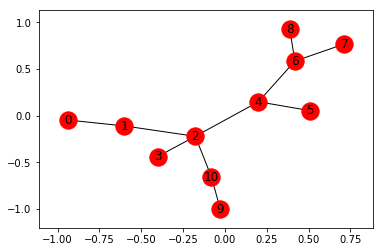

In [8]:
g = nx.Graph()
g.add_nodes_from(range(10))
g.add_edges_from([(0,1), (1,2),(2,3),(2,4),(2,10),(4,5),(4,6),(6,7),(6,8), (9,10)])
pos = nx.spring_layout(g)
labels = nx.draw_networkx_labels(g, pos=pos)
nx.draw_networkx_nodes(g, pos=pos)
nx.draw_networkx_edges(g, pos=pos)
plt.show()

From the figure above, it's easy to see the clusters and leaves. It seems a good solution to form hyper-edges as `[1,2,3,4,10` and `[4,6,7,8]`, while for node 0, 9, it's better to use current edge as hyper-edges since their degree are both 1, making it nonsense to create a `cluster`. Therefore, the output of this method should be something like:

`[[1,2,3,4,10],[4,6,7,8],[0,1],[9,10],[4,5]`

In [9]:
hyper_edges = Simulator.auto_discover_hyper_edge(g)
print(hyper_edges)

[[1, 2, 3, 4, 10], [4, 6, 7, 8], [0, 1], [4, 5], [9, 10]]


### 2. Automatically generated graph: line graph and star graph

Next, we'll test two special graph model. The first model is line graph. By visual inspect, the best we can do is to group three consecutive nodes into one hyper-edge, and repreat this for the whole graph. Since local centers cannot be connected to each other, nodes belonging to one hyper-edge could not become another local center.

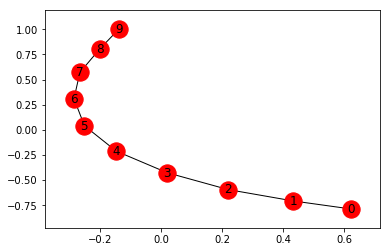

In [16]:
g = nx.path_graph(10)
pos = nx.spring_layout(g)
nx.draw_networkx_labels(g, pos=pos)
nx.draw_networkx_nodes(g, pos=pos)
nx.draw_networkx_edges(g, pos=pos)
plt.show()

In [17]:
hyper_edges = Simulator.auto_discover_hyper_edge(g)
print(hyper_edges)

[[0, 1, 2], [2, 3, 4], [4, 5, 6], [6, 7, 8], [8, 9]]


The second model is star graph. It is pretty simple, as all but one nodes are connected to the center. Thus, the output should be one hyper-edge containing all nodes.

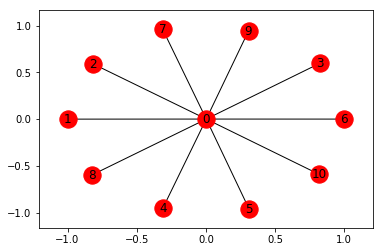

In [13]:
g = nx.star_graph(10)
pos = nx.spring_layout(g)
nx.draw_networkx_labels(g, pos=pos)
nx.draw_networkx_nodes(g, pos=pos)
nx.draw_networkx_edges(g, pos=pos)
plt.show()

In [14]:
hyper_edges = Simulator.auto_discover_hyper_edge(g)
print(hyper_edges)

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
